In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#minimum marks to 40 to pas in a exam
passmark = 40

In [3]:
df = pd.read_csv('C:/Users/lode/Downloads/student/StudentsPerformance.csv')

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df_std = df.copy()

In [9]:
df_std

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='math score', ylabel='count'>

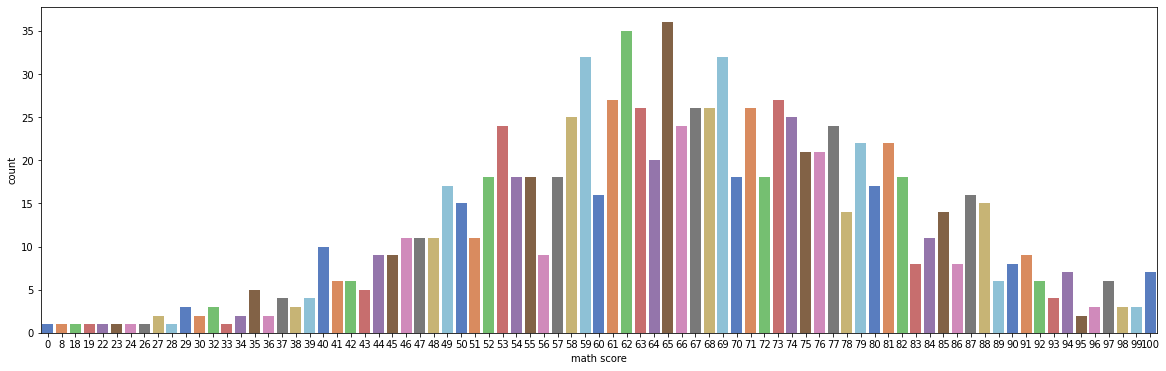

In [14]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'math score', data = df_std, palette = 'muted')

In [18]:
df_std['Math_PassStatus'] = np.where(df_std['math score'] < passmark, 'F', 'P')
df_std['Math_PassStatus'].value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

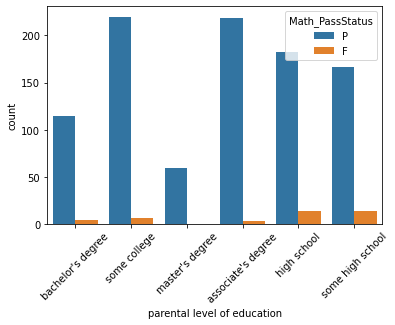

In [20]:
sns.countplot(x = 'parental level of education', data = df_std, hue = 'Math_PassStatus')
plt.xticks(rotation = 45)

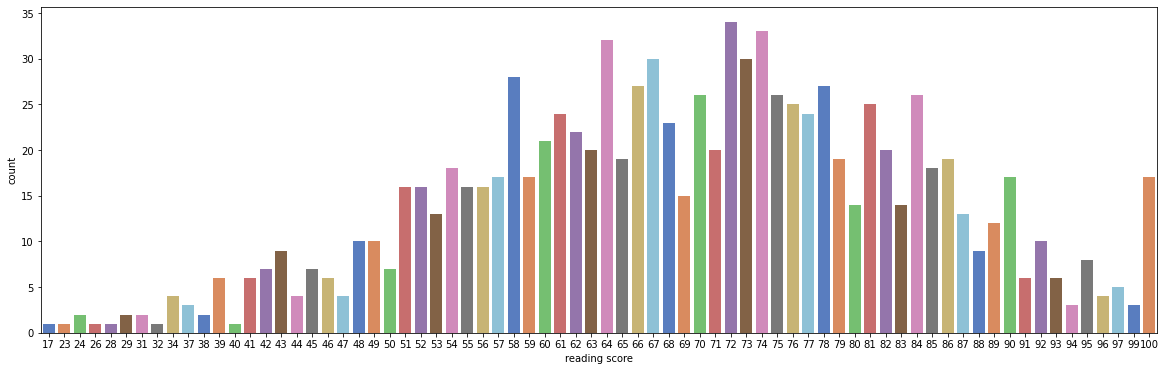

In [23]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'reading score', data = df_std, palette = 'muted')
plt.show()

In [27]:
df_std['Reading_PassStatus'] = np.where(df_std['reading score'] < passmark, 'F', 'P')
df_std['Reading_PassStatus'].value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

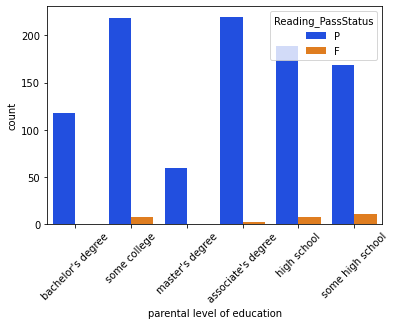

In [31]:
sns.countplot(x = 'parental level of education',
              data = df_std, hue = 'Reading_PassStatus',
              palette = 'bright')
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='writing score', ylabel='count'>

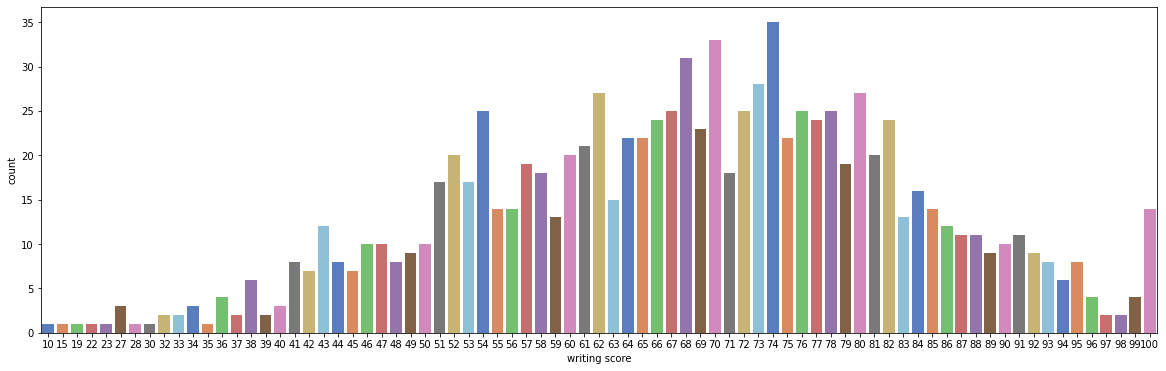

In [33]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'writing score', data = df_std, palette = 'muted')

In [37]:
df_std['Writing_PassStatus'] = np.where(df_std['writing score'] < passmark, 'F', 'P')
df_std['Writing_PassStatus'].value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

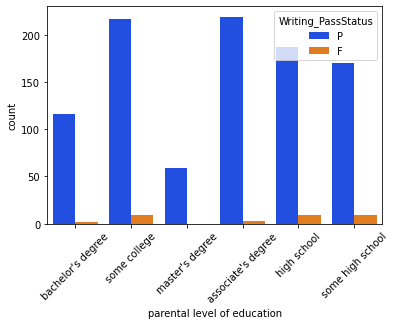

In [39]:
sns.countplot(x = 'parental level of education',
              data = df_std, hue = 'Writing_PassStatus',
              palette = 'bright')
plt.xticks(rotation = 45)

In [47]:
df_std['OverAll_PassStatus'] = df_std.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P',
                                           axis = 1)
df_std['OverAll_PassStatus'].value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

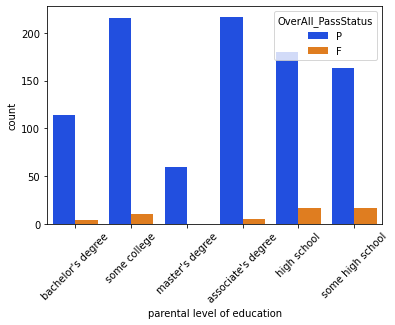

In [49]:
sns.countplot(x = 'parental level of education', data = df_std, hue = 'OverAll_PassStatus', palette = 'bright')
plt.xticks(rotation = 45)

In [52]:
df_std['Total_Marks'] = df_std['math score'] + df_std['reading score'] + df_std['writing score']
df_std['Percentage'] = df_std['Total_Marks'] / 3

In [53]:
df_std

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P,223,74.333333


<AxesSubplot:xlabel='Percentage', ylabel='count'>

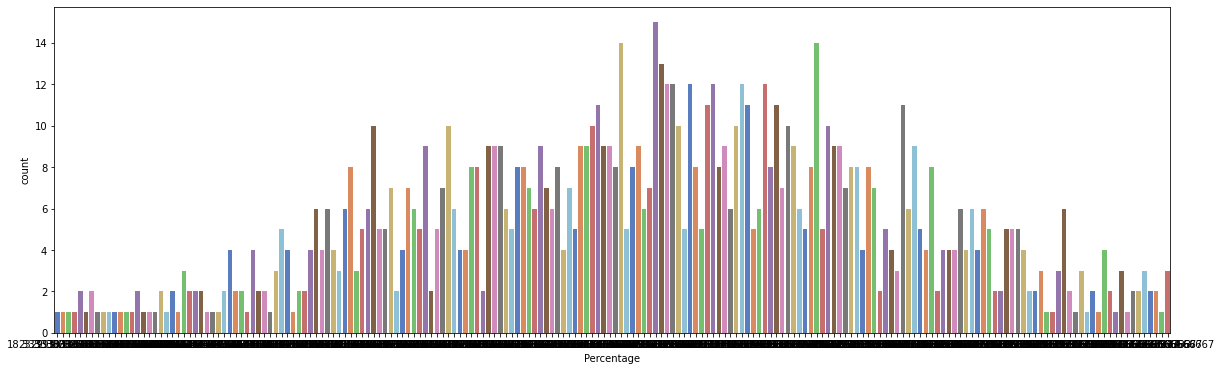

In [64]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'Percentage', data = df_std, palette = 'muted')

In [65]:
#GRADING
#above 80 = A Grade
#70 to 80 = B Grade
#60 to 70 = C Grade
#50 to 60 = D Grade
#40 to 50 = E Grade
#below 40 = F Grade (means fail)

In [66]:
def GetGrade(Percentage, OverAll_PassStatus) :
    if (OverAll_PassStatus == 'F') :
        return 'F'
    if (Percentage >= 80) :
        return 'A'
    if (Percentage >= 70) :
        return 'B'
    if (Percentage >= 60) :
        return 'C'
    if(Percentage >= 50) :
        return 'D'
    if (Percentage >= 40) :
        return 'E'
    else :
        return 'F'

In [73]:
df_std['Grade'] = df_std.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis = 1)
df_std['Grade'].value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

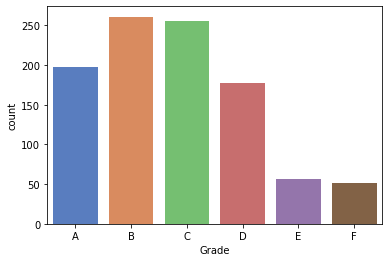

In [74]:
sns.countplot(x = 'Grade', data = df_std, order = ['A', 'B', 'C', 'D', 'E', 'F'], palette = 'muted')
plt.show()

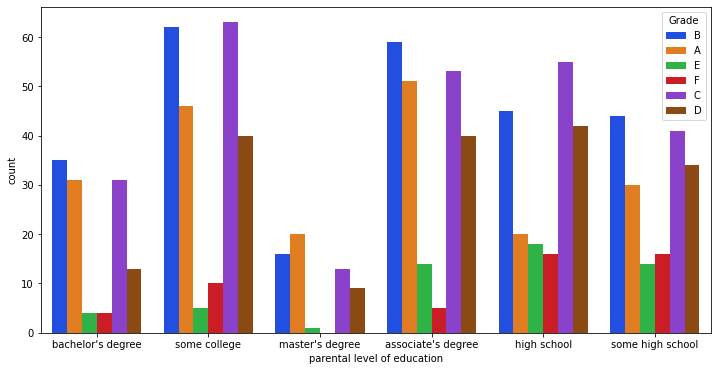

In [77]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'parental level of education', data = df_std, hue = 'Grade', palette = 'bright')
plt.show()